Distribution of Classifications:
A    53
B    47
Name: Classification, dtype: int64


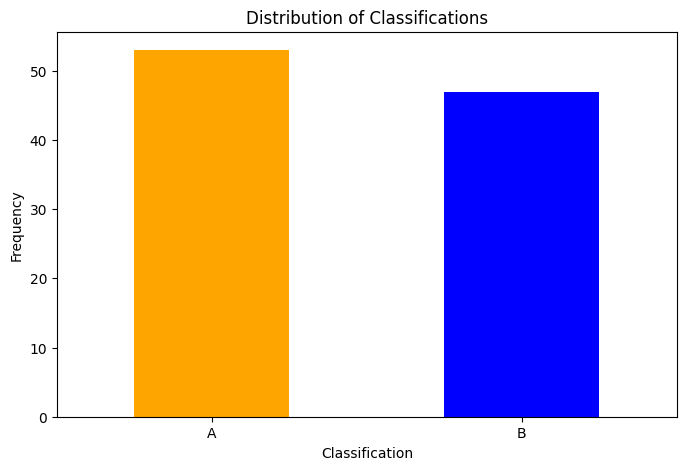

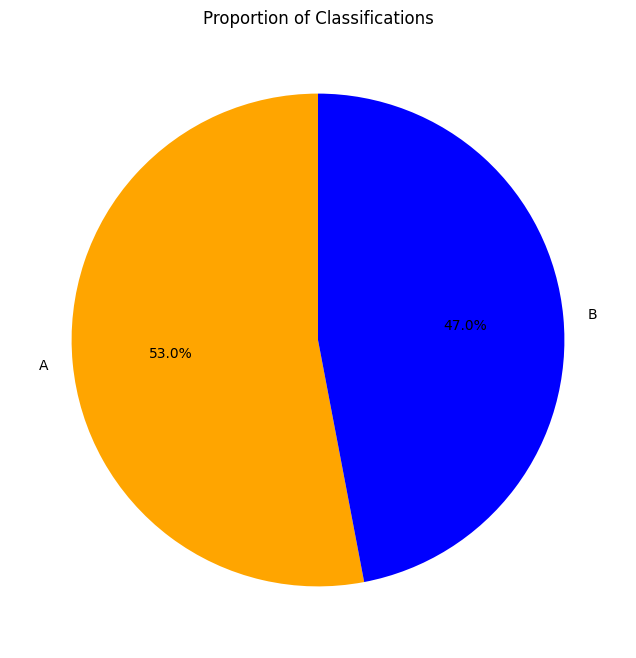

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "../data/output_evaluation/bg/triviaqaSimpleQA-BGGEMMA2-llm.csv"  
df = pd.read_csv(filename)

distribution = df['Classification'].value_counts()
print("Distribution of Classifications:")
print(distribution)


plt.figure(figsize=(8, 5))
distribution.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.title('Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 8))
distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'blue', 'green'])
plt.title('Proportion of Classifications')
plt.ylabel('') 
plt.show()



Distribution of Classifications:
B    40
A    27
C     3
Name: Classification, dtype: int64


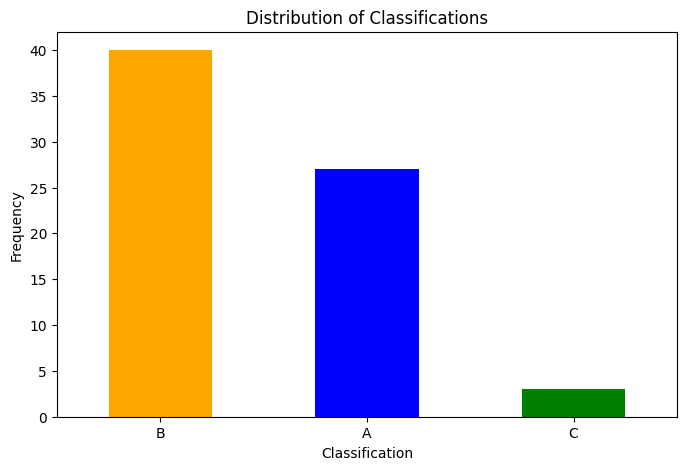

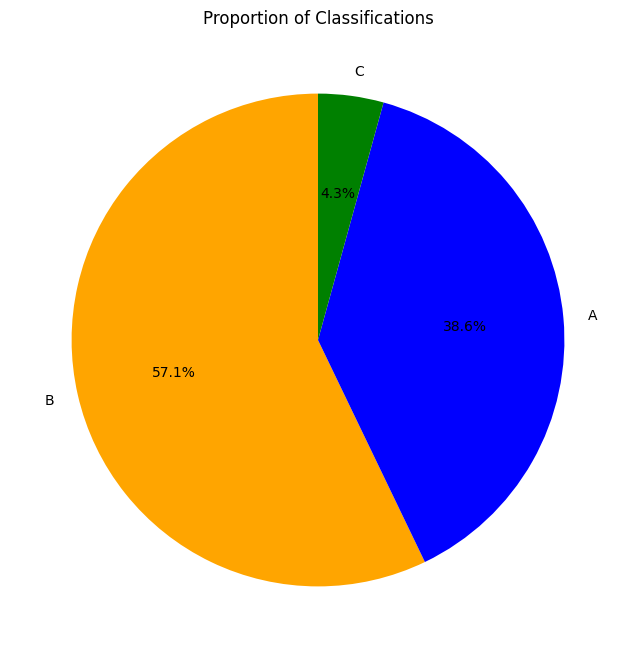

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "../data/output_evaluation/bg/triviaqaSimpleQA-Mistral.csv"
df = pd.read_csv(filename)

distribution = df['Classification'].value_counts()
print("Distribution of Classifications:")
print(distribution)


plt.figure(figsize=(8, 5))
distribution.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.title('Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 8))
distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'blue', 'green'])
plt.title('Proportion of Classifications')
plt.ylabel('') 
plt.show()

Distribution of Classifications:
A    68
B    30
C     2
Name: Classification, dtype: int64


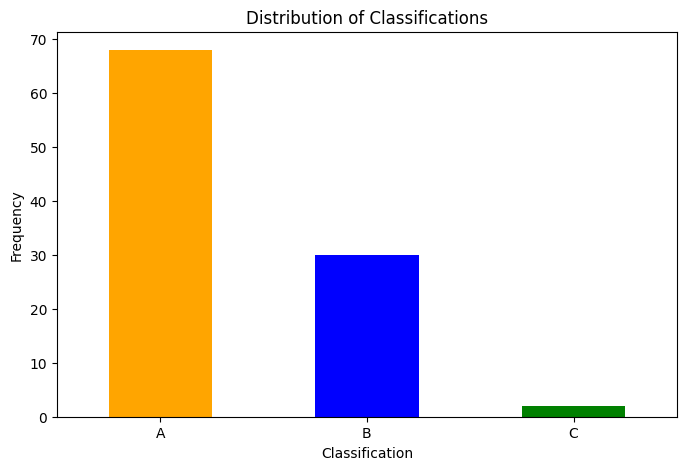

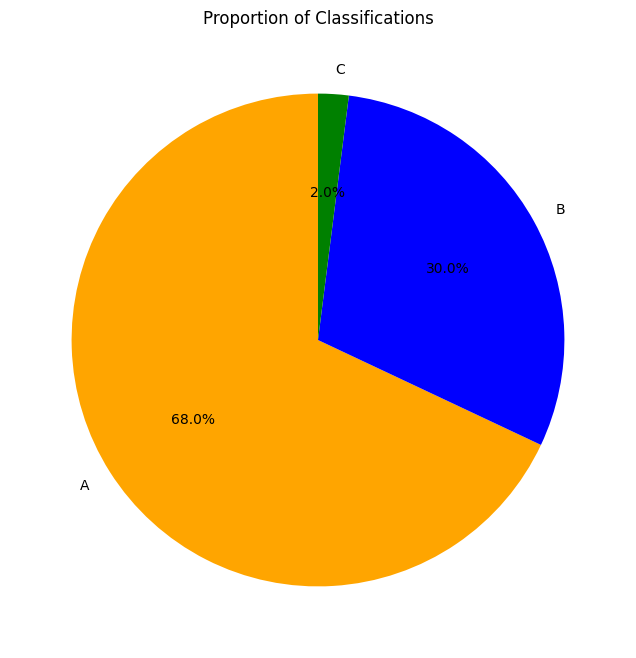

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "../data/output_evaluation/en/trivia_answers_english_gemma_NEW.csv"
df = pd.read_csv(filename)

distribution = df['Classification'].value_counts()
print("Distribution of Classifications:")
print(distribution)


plt.figure(figsize=(8, 5))
distribution.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.title('Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 8))
distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'blue', 'green'])
plt.title('Proportion of Classifications')
plt.ylabel('') 
plt.show()

Distribution of Classifications:
A    62
B    36
C     1
Name: Classification, dtype: int64


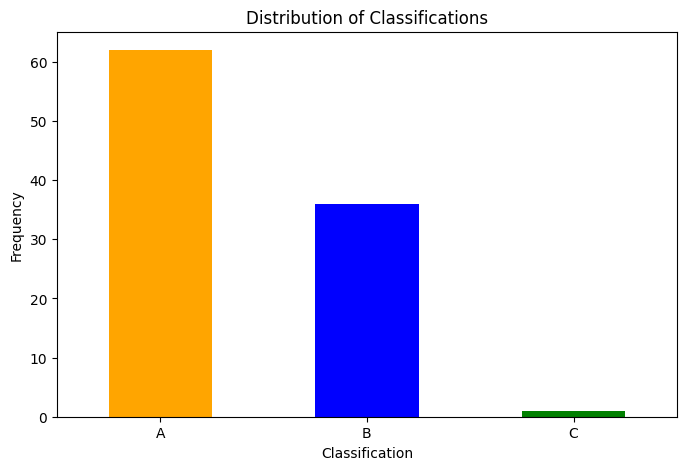

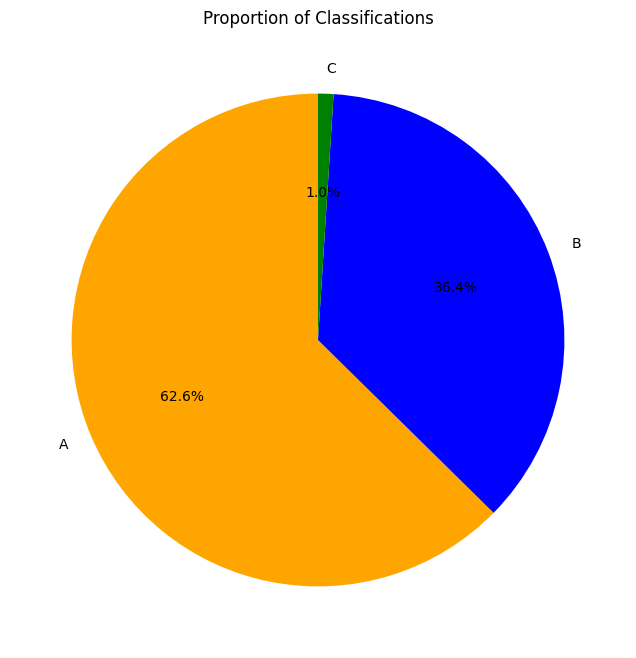

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "../data/output_evaluation/en/trivia_answers_english_mistral_cleaned_NEW.csv"
df = pd.read_csv(filename)

distribution = df['Classification'].value_counts()
print("Distribution of Classifications:")
print(distribution)


plt.figure(figsize=(8, 5))
distribution.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.title('Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 8))
distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'blue', 'green'])
plt.title('Proportion of Classifications')
plt.ylabel('') 
plt.show()

Distribution of Classifications:
B    53
A    41
C     5
Name: Classification, dtype: int64


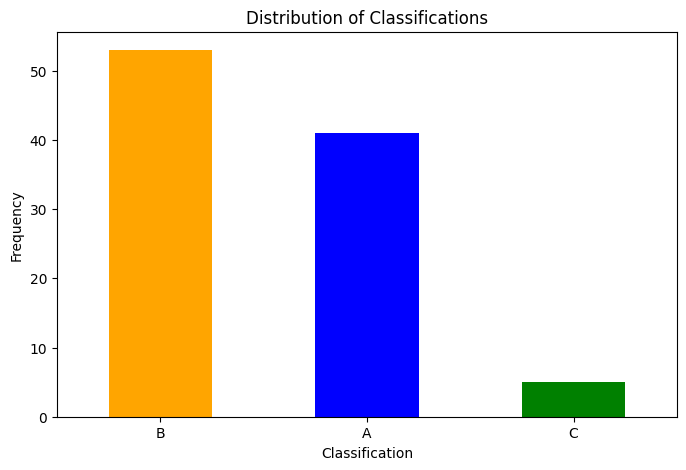

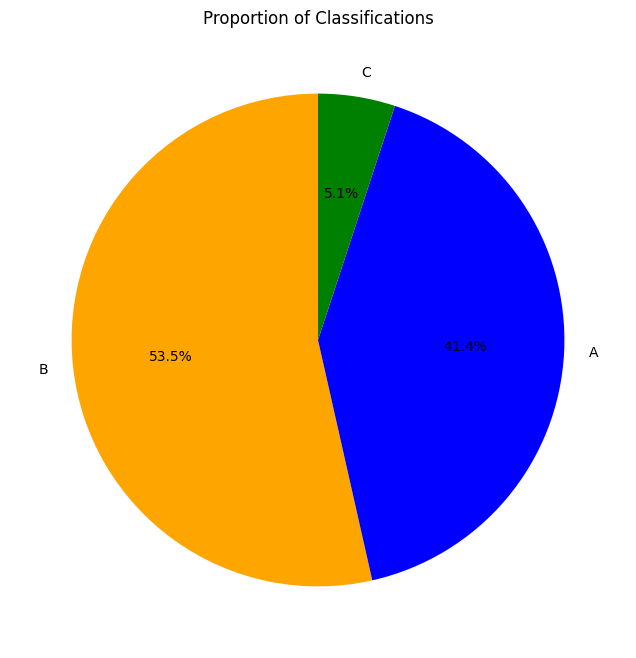

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "../data/output_evaluation/pl/trivia_answers_polish_bielik_cleaned_NEW.csv"
df = pd.read_csv(filename)

distribution = df['Classification'].value_counts()
print("Distribution of Classifications:")
print(distribution)


plt.figure(figsize=(8, 5))
distribution.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.title('Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 8))
distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'blue', 'green'])
plt.title('Proportion of Classifications')
plt.ylabel('') 
plt.show()

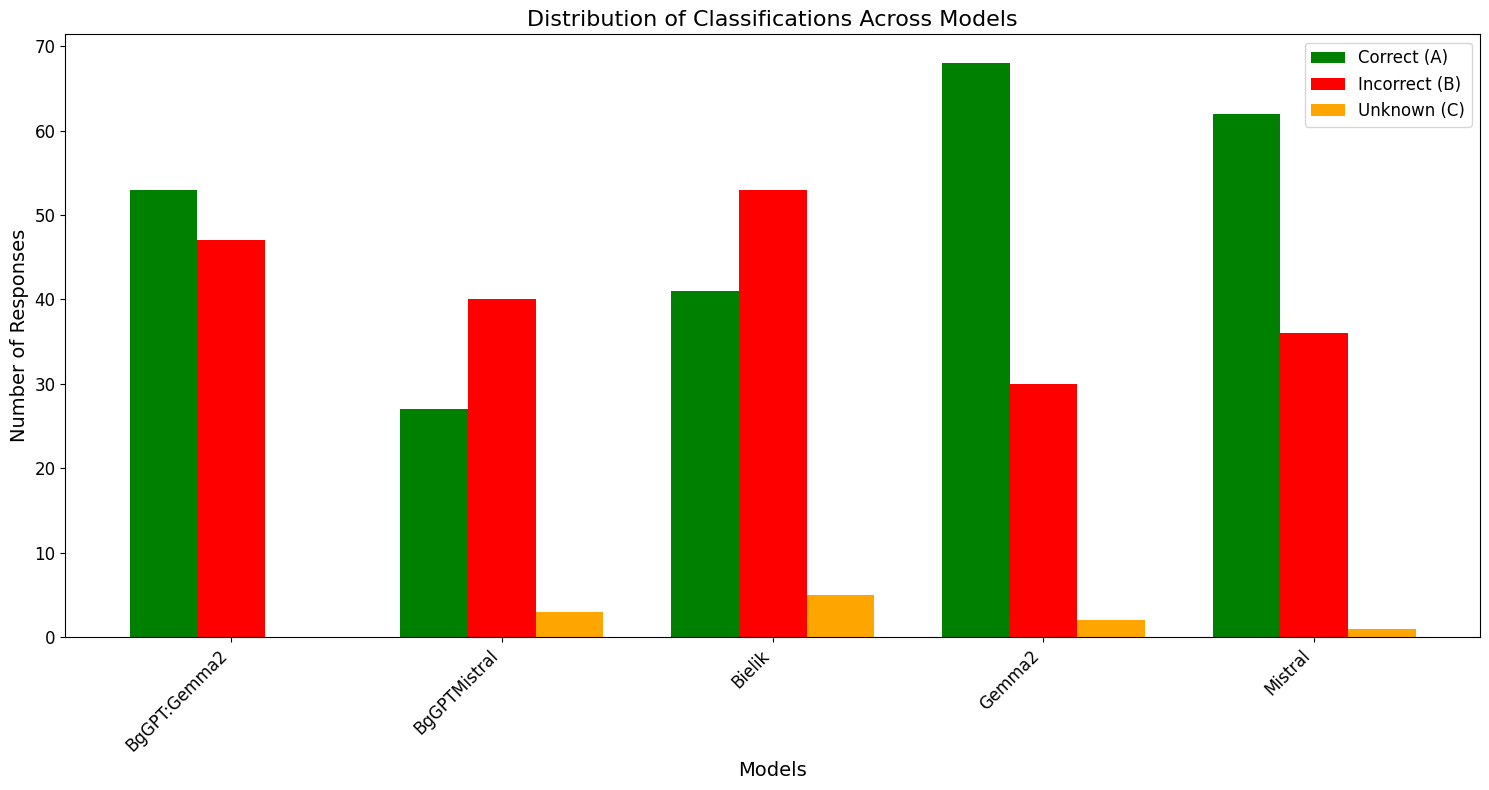

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
models = {
    'BgGPT:Gemma2': "../data/output_evaluation/bg/triviaqaSimpleQA-BGGEMMA2-llm.csv",
    'BgGPTMistral': "../data/output_evaluation/bg/triviaqaSimpleQA-Mistral.csv",
    'Bielik': "../data/output_evaluation/pl/trivia_answers_polish_bielik_cleaned_NEW.csv",
    'Gemma2': "../data/output_evaluation/en/trivia_answers_english_gemma_NEW.csv",
    'Mistral': "../data/output_evaluation/en/trivia_answers_english_mistral_cleaned_NEW.csv",
}

plt.figure(figsize=(15, 8))


classification_data = {'A': [], 'B': [], 'C': []}

for model_name, file_path in models.items():
  
    df = pd.read_csv(file_path)
    

    df['Mapped Classification'] = df['Classification'].map({
        'Correct': 'A',
        'Incorrect': 'B',
        'Partially Correct': 'C'
    })
    
    
    distribution = df['Classification'].value_counts()
    
 
    for classification in ['A', 'B', 'C']:
        classification_data[classification].append(distribution.get(classification, 0))


x = range(len(models))

width = 0.25

plt.bar([i - width for i in x], classification_data['A'], width, label='Correct (A)', color='green')
plt.bar(x, classification_data['B'], width, label='Incorrect (B)', color='red')
plt.bar([i + width for i in x], classification_data['C'], width, label='Unknown (C)', color='orange')

plt.xlabel('Models', fontsize=14)
plt.ylabel('Number of Responses', fontsize=14)
plt.title('Distribution of Classifications Across Models', fontsize=16)
plt.xticks(x, models.keys(), rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

